<a href="https://colab.research.google.com/github/Acottle1031/Water-Potability-Project/blob/main/Project_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Potable Water 

Name: Austin Cottle

Date: 7/1/2022

Goal: Our goal here will be to create a classification model, determining whether or not water is "potable"

In [1]:
# Lets take care of our imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


In [2]:
water_df = pd.read_csv('/content/drive/MyDrive/07 Week 7 - Classification Models/Data Sets/Project_2_Water_Dataset.csv')
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water_df.shape

(3276, 10)

Dataset 2 information: 

1. Source: Source: https://www.kaggle.com/datasets/adityakadiwal/water-potability (states this is publicly available for use under "license")

2. Description: This data set provides us with a collection of variables in regards to determining whether or not water is "potable" (safe for human consumption.) Including, Ph: a metric for determining the acidity-base balance of water, Solids: a metric for determining the amount of dissolved solids within water causing it to be diluted and mineralized, and Chloramines: the amount of chloramines produced when ammonia is added to chlorine to treat drinking water, higher amounts of Chloramines shows high concentrations of Ammonia/Chlorine potentially causing water to be unsafe. 

3. Target: Our target will be "Potability", whether or not water is safe for human consumption

4. Classification or Regression?: This will be a Classification question

5. How many features?: There are 10 total features (9 when excluding target)

6. How many rows?: There are 3,276 total rows

7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?: I predict the challenges for data set, along with the added difficulty of there being missing data in this set. However, just as before, I'll be excited to work on this data set, as drinking water is an extremely important issue in the world today and being able to research and learn more about the issue is a great opportunity. 


# Data cleaning

Here we'll begin cleaning our data as needed, I'll explain along the way

In [4]:
# Lets start by looking for any duplicate rows

water_df.duplicated().sum()

0

In [5]:
# Next lets look at our data types

water_df.dtypes


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
# Next we'll check on unique values just to make sure there isnt anything strange, unlikely as the data is stricly numeric but it's always good to check

water_df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [7]:
# Next lets check for any missing values
water_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
# Creating copy of dataframe for modeling
modeling_df = water_df.copy()
modeling_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
# Lets begin imputing the data, to save space I'll be imputing all values in this cell
mean_ph = water_df['ph'].mean()
mean_sulfate = water_df['Sulfate'].mean()
mean_tri = water_df['Trihalomethanes'].mean()
water_df['ph'].fillna(mean_ph, inplace=True)
water_df['Sulfate'].fillna(mean_sulfate, inplace=True)
water_df['Trihalomethanes'].fillna(mean_tri, inplace=True)

# Lets make sure they all were imputed properly
water_df.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
# Now that we've imputed our data, lets look into it to see if we have any strange values
water_df.describe()

# Most of these values look very consistent, I don't believe there's any cause for concern here

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# EDA

0    0.60989
1    0.39011
Name: Potability, dtype: float64


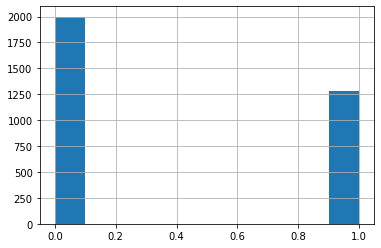

In [11]:
# We'll start with the distribution of our potable water 
water_df['Potability'].hist();
print(water_df['Potability'].value_counts(normalize=True))

According to this it looks like 2000 of our values are not potable which is about 60% of our data while 39% (about 1300 values) are identified as drinkable water

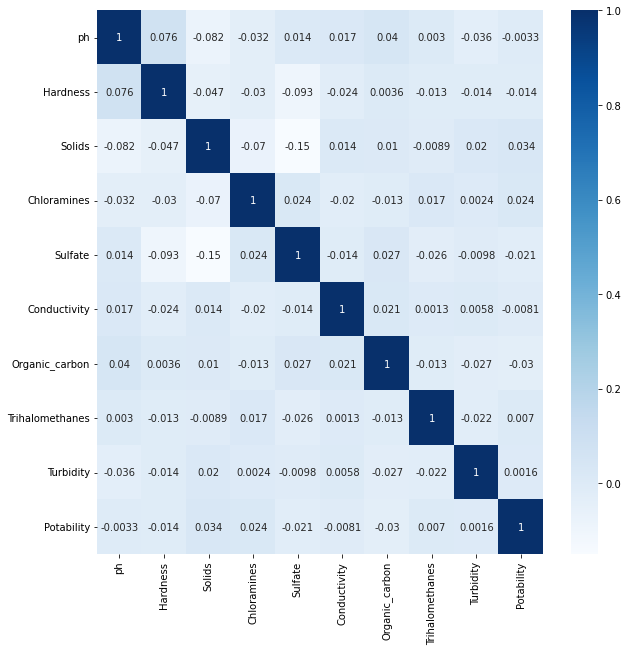

In [12]:
# Lets look at a correlation heatmap
corr = water_df.corr()
fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, cmap="Blues",annot=True);

It looks like most of our data doesnt have any major points of correlation, our highest positive correlation at 0.076 for Solids to PH, and our highest negative correlation would be -0.15 for Sulfate to Turbidity.

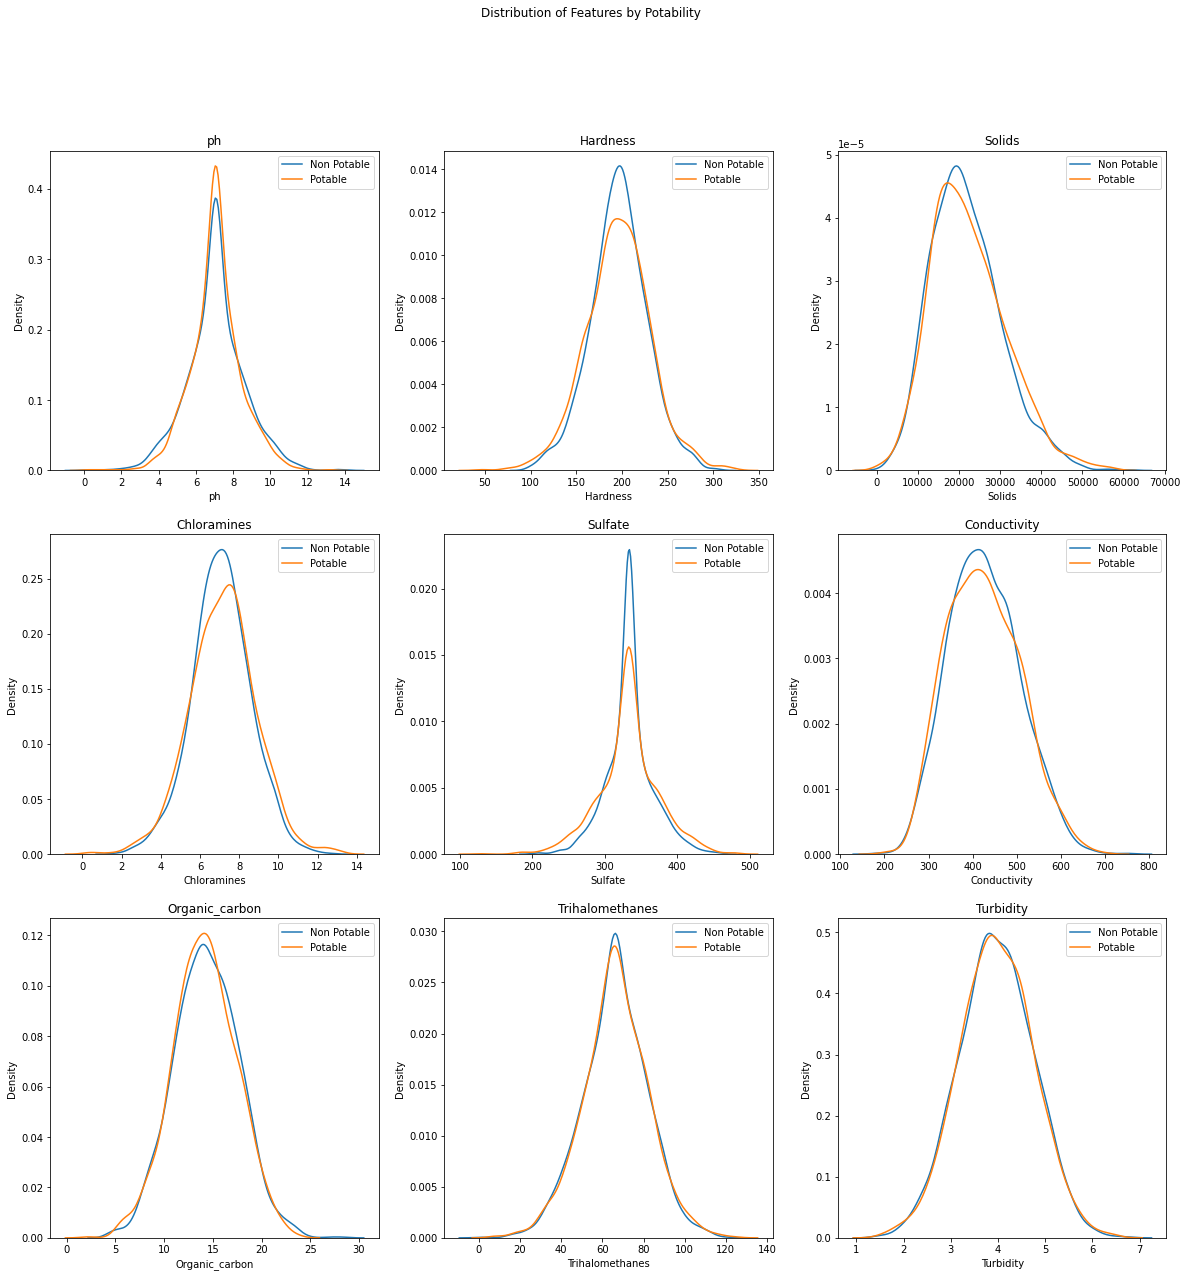

In [13]:
# Distribution of features by potability
non_potable = water_df[water_df['Potability'] == 0]
potable = water_df[water_df['Potability'] == 1]

plt.figure(figsize=(20,20))

for ax,col in enumerate(water_df.columns[:9]):
  plt.subplot(3,3, ax+1)
  plt.title(col)
  sns.kdeplot(x=non_potable[col], label = "Non Potable", warn_singular=False)
  sns.kdeplot(x=potable[col], label = "Potable", warn_singular=False)
  plt.legend()
  plt.suptitle('Distribution of Features by Potability')

plt.show();

Looking at this Kernel Density Plot we can see that most of our Non-Potable water shares a lot of similar feature values with our Potable water. I'd assume that with this being the case I'd assume that these features are relatively individual and we won't be able to extract any meaningful relationships from them. However, we *can* look at what features might be more beneficial to look at when determining potability going forward.

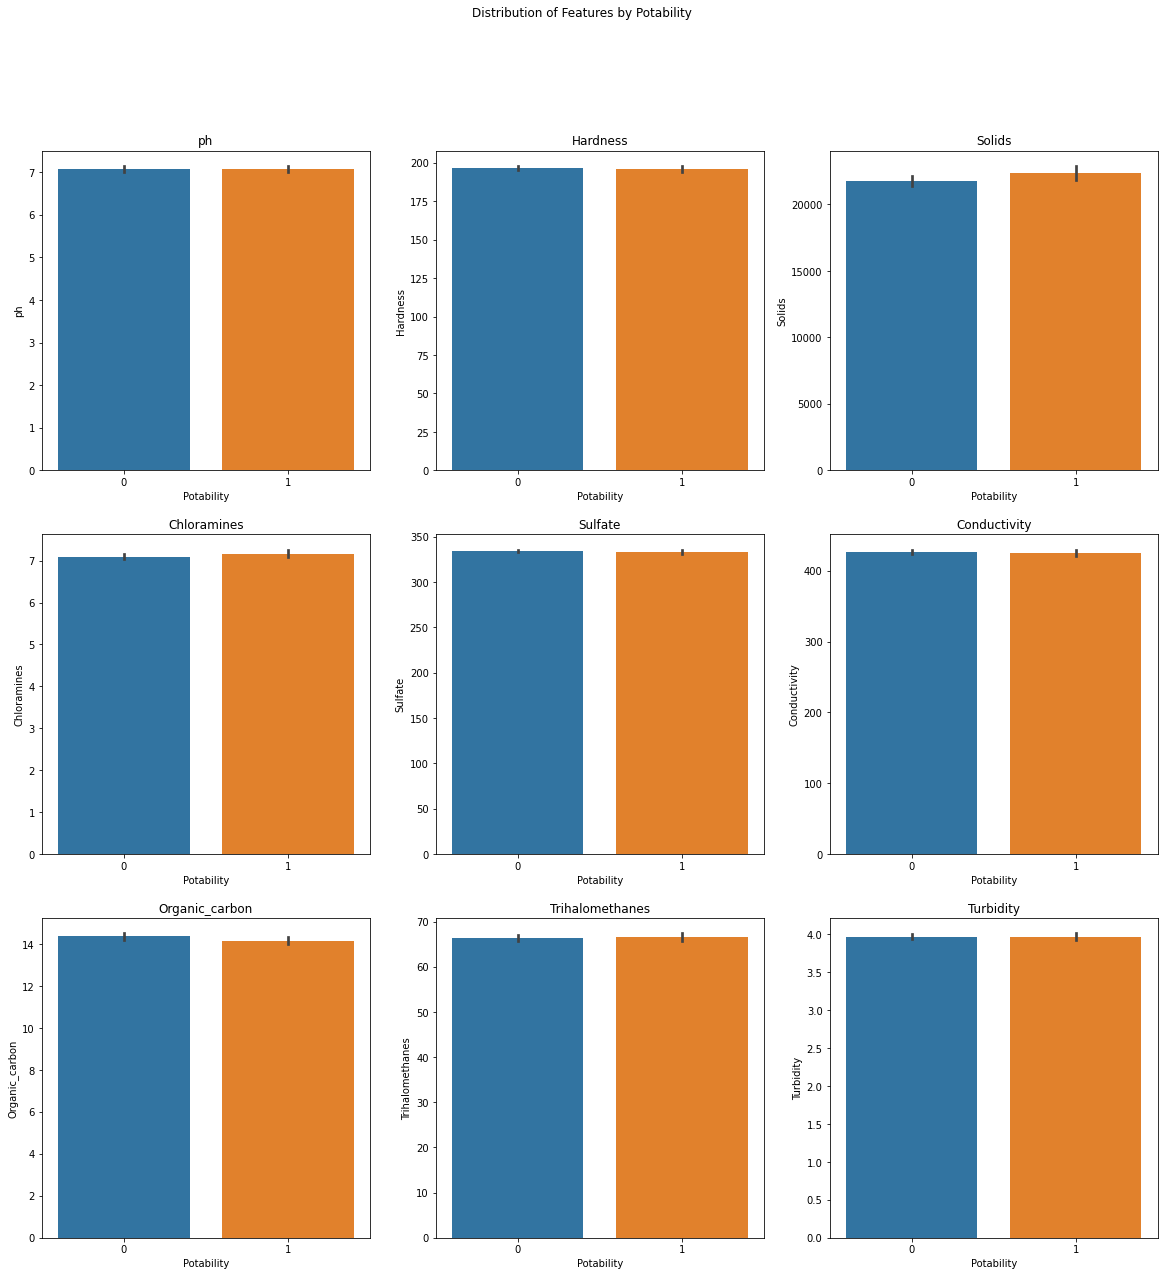

In [14]:
plt.figure(figsize=(20,20))
for ax,col in enumerate(water_df.columns[:9]):
  plt.subplot(3,3, ax+1)
  plt.title(col)
  sns.barplot(x=water_df['Potability'], y=non_potable[col])
  sns.barplot(x=water_df['Potability'], y=potable[col])
  plt.suptitle('Distribution of Features by Potability')

plt.show();

# Modeling

In [15]:
# Creating train test split
X = modeling_df.drop(columns = ['Potability'])
y = modeling_df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Instantiating scaler and imputer
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy="mean")

# Making transformer pipeline
preprocessor = make_pipeline(mean_imputer, scaler)
preprocessor

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [17]:
# we'll start fitting and transforming training data
preprocessor.fit(X_train, y_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[-6.08375267e-16,  1.82598413e-01,  2.13874521e-02, ...,
        -1.70619507e-01, -1.41991144e-01,  6.74635570e-01],
       [-1.21332958e+00,  2.32326687e-01,  3.65015772e-02, ...,
        -8.62450334e-02,  1.05057828e+00, -1.32667001e+00],
       [ 1.77576592e-01, -8.95904973e-02,  5.27182276e-01, ...,
         6.88622580e-01, -3.38837416e-01, -3.74980595e-01],
       ...,
       [-3.15611949e-01, -2.98916491e-01,  1.00178820e+00, ...,
        -1.34438490e-01,  1.27680010e+00, -5.98447022e-01],
       [ 1.15899333e+00,  6.53604579e-01, -6.64431527e-01, ...,
         6.38336681e-01, -1.21829804e+00,  4.11720328e-01],
       [-2.69177822e-01,  5.21344294e-02,  1.42376121e+00, ...,
        -6.33358281e-01,  0.00000000e+00, -2.53461995e-01]])

In [18]:
# Instantiating Decision Tree Classifier model
%%time
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_processed, y_train)
dec_tree_preds = dec_tree.predict(X_test_processed)

CPU times: user 53.2 ms, sys: 0 ns, total: 53.2 ms
Wall time: 60.9 ms


Decision Classifier Tree Training Accuracy: 1.0
Decision Classifier Tree Testing Accuracy: 0.5958485958485958
Decision Classifier Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       510
           1       0.47      0.55      0.51       309

    accuracy                           0.60       819
   macro avg       0.58      0.59      0.58       819
weighted avg       0.61      0.60      0.60       819



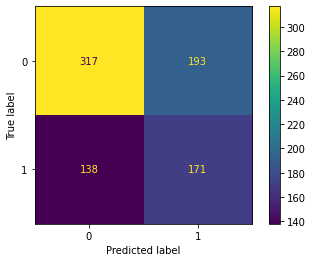

In [19]:
# Evaluatation of model with classification report and confusion matrix 
print(f'Decision Classifier Tree Training Accuracy: {dec_tree.score(X_train_processed, y_train)}')
print(f'Decision Classifier Tree Testing Accuracy: {dec_tree.score(X_test_processed, y_test)}')
print('Decision Classifier Tree Classification Report:')
print(classification_report(y_test, dec_tree_preds));
ConfusionMatrixDisplay.from_predictions(y_test, dec_tree_preds,);

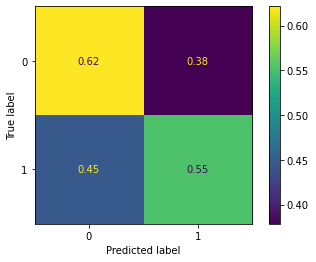

In [20]:
# Replotting with normalized values
ConfusionMatrixDisplay.from_predictions(y_test, dec_tree_preds, normalize="true");

Without tuning our decision tree classification model seems to be overfitted to our training data but is performing pretty well on testing at 59% accuracy, slightly over half of our predictions were correct! It's currently showing 138(45%) false negatives and 193 (38%) false positves. In this case, I'd assume false positives are worse due to the fact we'd be labeling water as safe for drinking when it is not. It's likely more harm will come from that rather than labeling safe drinking water as not safe.

In [21]:
# lets look into tuning this using GridSearchCV
%%time
dec_tree.get_params()
dec_tree_params = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
dt_gridsearch = GridSearchCV(dec_tree, dec_tree_params)
dt_gridsearch.fit(X_train_processed, y_train)
best_dec_tree = dt_gridsearch.best_estimator_
best_dec_tree.fit(X_train_processed, y_train)
best_dec_tree_preds = best_dec_tree.predict(X_test_processed)

CPU times: user 2.66 s, sys: 9 ms, total: 2.67 s
Wall time: 4.26 s


Decision Classifier Tree Training Accuracy: 0.6695156695156695
Decision Classifier Tree Testing Accuracy: 0.6434676434676435
Decision Classifier Tree Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       510
           1       0.58      0.20      0.30       309

    accuracy                           0.64       819
   macro avg       0.62      0.56      0.53       819
weighted avg       0.63      0.64      0.59       819



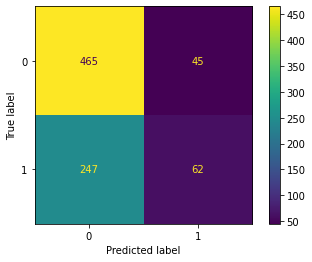

In [22]:
# Now that we've tuned the model slightly, lets re-evaluate like we did before
print(f'Decision Classifier Tree Training Accuracy: {best_dec_tree.score(X_train_processed, y_train)}')
print(f'Decision Classifier Tree Testing Accuracy: {best_dec_tree.score(X_test_processed, y_test)}')
print('Decision Classifier Tree Classification Report:')
print(classification_report(y_test, best_dec_tree_preds));
ConfusionMatrixDisplay.from_predictions(y_test, best_dec_tree_preds);

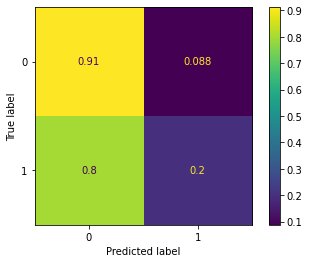

In [23]:
# Replotting confusion matrix with normalized value
ConfusionMatrixDisplay.from_predictions(y_test, best_dec_tree_preds, normalize='true');

After tuning the model, it no longer is overfit to the training data AND we were able to raise our accuracy score from 59% to 64%. This is good *however*, in doing so we managed to skew our predictions in favor of True Negative values. It showss in our confusion matrix that we went from 62% and 55% for True Negative and True Positive values respectively, to 91% (WOW) and 20% (not good) respectively. 

In [24]:
# Next lets look at a different model, KNearestNeighbors
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)
knn_preds = knn_pipe.predict(X_test_processed)

KNN Model Training Accuracy: 0.7578347578347578
KNN Model Testing Accuracy: 0.6263736263736264
KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.51      0.40      0.45       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.62       819



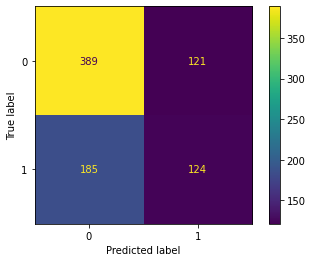

In [39]:
# Like before, we'll evaluate the model
print(f'KNN Model Training Accuracy: {knn.score(X_train_processed, y_train)}')
print(f'KNN Model Testing Accuracy: {knn.score(X_test_processed, y_test)}')
print('KNN Model Classification Report:')
print(classification_report(y_test, knn_preds));
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds);

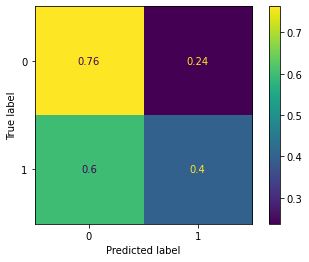

In [41]:
# Replotting with normalized values
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds, normalize = 'true');

Before tuning, our KNN model shows that it's not inherently overfitting our training data and received a testing accuracy score of 62% which is really good! Looking at our confusion matrixes we see that we're predicting 389 (76%) True Negative values and 124 (40%) True Positive values. Our False Positives and Negatives are slightly concerning, as about 60% of our predictions were false negatives, and 24% were false positives. Maybe tuning will help.

In [27]:
# Tuning KNN model with GridSearchCV
%%time
knn.get_params()

knn_params = {'n_neighbors': range(1,20),
              'p': range(1,10),
              'weights':['uniform', 'distance']}

knn_gridsearch = GridSearchCV(knn, knn_params)
knn_gridsearch.fit(X_train_processed, y_train)
best_knn = dt_gridsearch.best_estimator_
best_knn.fit(X_train_processed, y_train)
best_knn_preds = best_knn.predict(X_test_processed)

CPU times: user 9min 30s, sys: 993 ms, total: 9min 31s
Wall time: 10min 10s


Best KNN Model Training Accuracy: 0.6695156695156695
Best KNN Model Testing Accuracy: 0.6434676434676435
Best KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       510
           1       0.58      0.20      0.30       309

    accuracy                           0.64       819
   macro avg       0.62      0.56      0.53       819
weighted avg       0.63      0.64      0.59       819



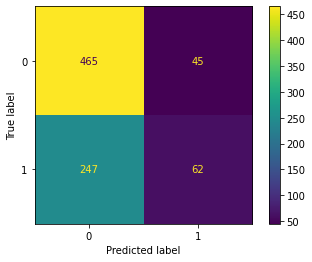

In [28]:
# Like before lets evaluate this model with confusion matrix and classification report
print(f'Best KNN Model Training Accuracy: {best_knn.score(X_train_processed, y_train)}')
print(f'Best KNN Model Testing Accuracy: {best_knn.score(X_test_processed, y_test)}')
print('Best KNN Model Classification Report:')
print(classification_report(y_test, best_knn_preds));
ConfusionMatrixDisplay.from_predictions(y_test, best_knn_preds);

Tuned KNN Matrix:


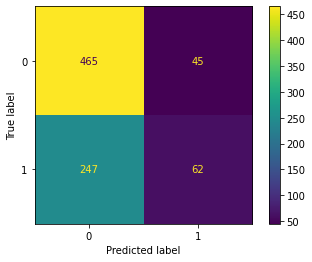

In [29]:
# Replotting both tuned confusion matrices to look at differences for each model
print('Tuned KNN Matrix:') 
ConfusionMatrixDisplay.from_predictions(y_test, best_knn_preds);

Tuned Decision Classification Tree Matrix:


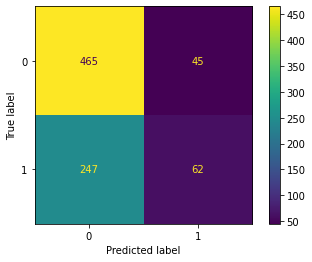

In [38]:
print('Tuned Decision Classification Tree Matrix:')
ConfusionMatrixDisplay.from_predictions(y_test, best_dec_tree_preds);

After tuning both of our models, they oddly enough have the exact same predictions. I'm not 100% sure why this would be the case, could be a coincidence, it could be that this dataset might not have enough information for our models to make proper predictions and that may be skewing our results for our tuning/predictions.

# PCA Modeling

In [31]:
# Lets add PCA to the mix to see if we can get any better results
# Due to the nature of the data, to not lose too much, I'll set PCA to 95% variance explanation
# Instantiating PCA
pca = PCA(n_components=.95)


In [32]:
# creating pca pipeline including scaler, mean_imputer, and pca, fitting and transforming
pca_processing_pipe = make_pipeline(scaler, mean_imputer, pca)
pca_processing_pipe.fit(X_train, y_train)
X_train_pca_processed = pca_processing_pipe.transform(X_train)
X_test_pca_processed = pca_processing_pipe.transform(X_test)

Decision Classifier Tree Training Accuracy: 1.0
Decision Classifier Tree Testing Accuracy: 0.5592185592185592
Decision Classifier Tree Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       510
           1       0.42      0.44      0.43       309

    accuracy                           0.56       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.56      0.56      0.56       819

CPU times: user 163 ms, sys: 54 ms, total: 217 ms
Wall time: 159 ms


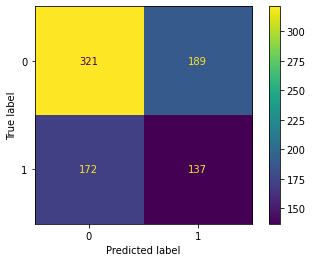

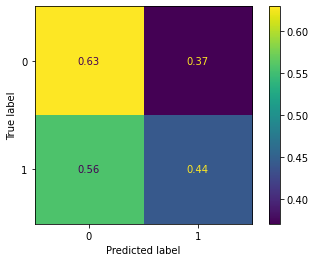

In [33]:
# Now that our data has been processed with PCA lets look into the modeling
%%time
dec_tree.fit(X_train_pca_processed, y_train)
dec_tree_pca_preds = dec_tree.predict(X_test_pca_processed)
print(f'Decision Classifier Tree Training Accuracy after PCA: {dec_tree.score(X_train_pca_processed, y_train)}')
print(f'Decision Classifier Tree Testing Accuracy after PCA: {dec_tree.score(X_test_pca_processed, y_test)}')
print('Decision Classifier Tree Classification Report after PCA:')
print(classification_report(y_test, dec_tree_pca_preds));
ConfusionMatrixDisplay.from_predictions(y_test, dec_tree_pca_preds);
ConfusionMatrixDisplay.from_predictions(y_test, dec_tree_pca_preds, normalize='true')

Like our previous Decision Classification Tree, before tuning this one did inherently overfit to our training data. However, we do see some changes in our initial predictions! Our True Negatives were increased from 317(62%) to 321 (63%). Unfortunately we did take a hit on our True Positives, from 171(55%) to 137(44%). Aside from that we see that our False Negatives increased to 172 (56%) from 138 (45%), and our False Positives, went from 193(38%) to 189(37%)


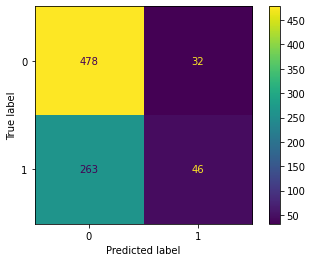

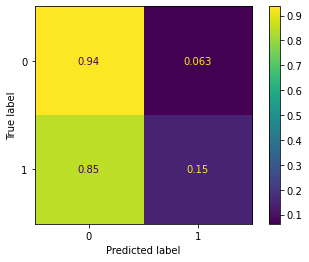

In [35]:
# Lets tune the Decision Tree Classifier with PCA
dec_tree.get_params()
dec_tree_params = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
dt_gridsearch = GridSearchCV(dec_tree, dec_tree_params)
dt_gridsearch.fit(X_train_processed, y_train)
best_dec_tree = dt_gridsearch.best_estimator_
best_dec_tree.fit(X_train_pca_processed, y_train)
best_pca_dec_tree_preds = best_dec_tree.predict(X_test_pca_processed)
ConfusionMatrixDisplay.from_predictions(y_test, best_pca_dec_tree_preds);
ConfusionMatrixDisplay.from_predictions(y_test, best_pca_dec_tree_preds, normalize='true');

After tuning the decision tree classifier with PCA we see that our True positives have declined dramatically, along with our false positives(if the true positives were higher this might be awesome!). We also see that our True Negatives increased dramatically, our False Negatives as well. 

KNN Model Training Accuracy: 0.7590557590557591
KNN Model Testing Accuracy: 0.6275946275946276
KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       510
           1       0.51      0.39      0.44       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.62       819



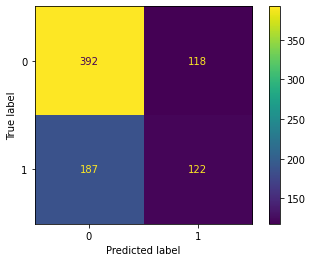

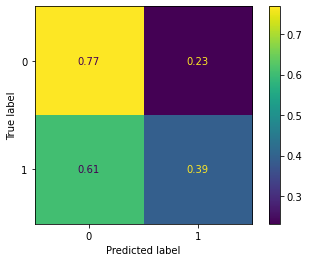

In [44]:
# Next we'll do the same for the KNN model with PCA
knn.fit(X_train_pca_processed, y_train)
knn_pca_preds = knn.predict(X_test_pca_processed)
print(f'KNN Model Training Accuracy: {knn.score(X_train_pca_processed, y_train)}')
print(f'KNN Model Testing Accuracy: {knn.score(X_test_pca_processed, y_test)}')
print('KNN Model Classification Report:')
print(classification_report(y_test, knn_pca_preds));
ConfusionMatrixDisplay.from_predictions(y_test, knn_pca_preds);
ConfusionMatrixDisplay.from_predictions(y_test, knn_pca_preds, normalize='true');

#Data Dictionary 


pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO (World Health Organization) has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
